<a href="https://colab.research.google.com/github/imranahmed123/DataScience-AI-ML/blob/main/MyNotebook1_TypesofDistributions_310524.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A histogram displays the frequency distribution of a dataset by dividing the data into bins and showing the count of observations in each bin.

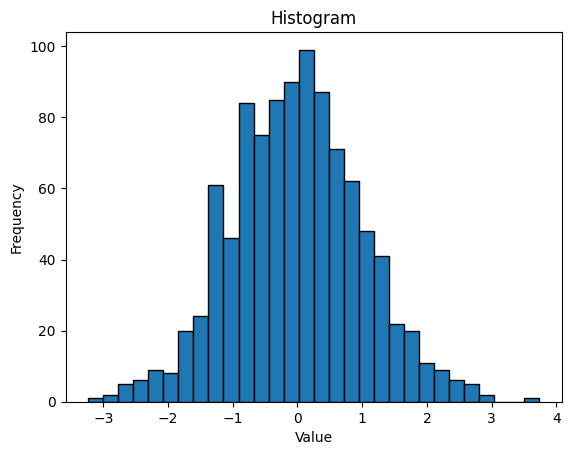

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data from a normal distribution
data = np.random.normal(loc=0, scale=1, size=1000)

# Plot histogram
plt.hist(data, bins=30, edgecolor='k')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


Probability Density Function (PDF)
A PDF shows the likelihood of a continuous random variable taking on a particular value.


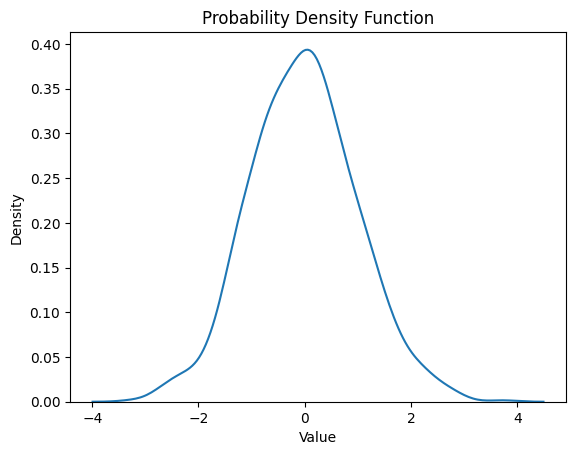

In [2]:
import seaborn as sns

# Plot PDF
sns.kdeplot(data)
plt.title('Probability Density Function')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


Cumulative Distribution Function (CDF)
A CDF shows the probability that a random variable will take on a value less than or equal to a specific value.

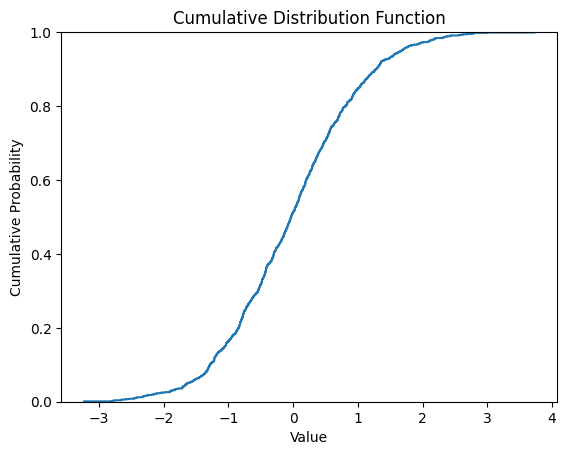

In [3]:
# Plot CDF
sns.ecdfplot(data)
plt.title('Cumulative Distribution Function')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.show()


Standardization vs. Normalization
Standardization: Standardization transforms data to have a mean of 0 and a standard deviation of 1.

Normalization:Normalization transforms data to a specific range, often [0, 1] or [-1, 1].

Applying Both Standardization and Normalization
We'll use the array [50,60,70,80,90] and apply both standardization and normalization to it. Then, we'll plot the original, standardized, and normalized values.

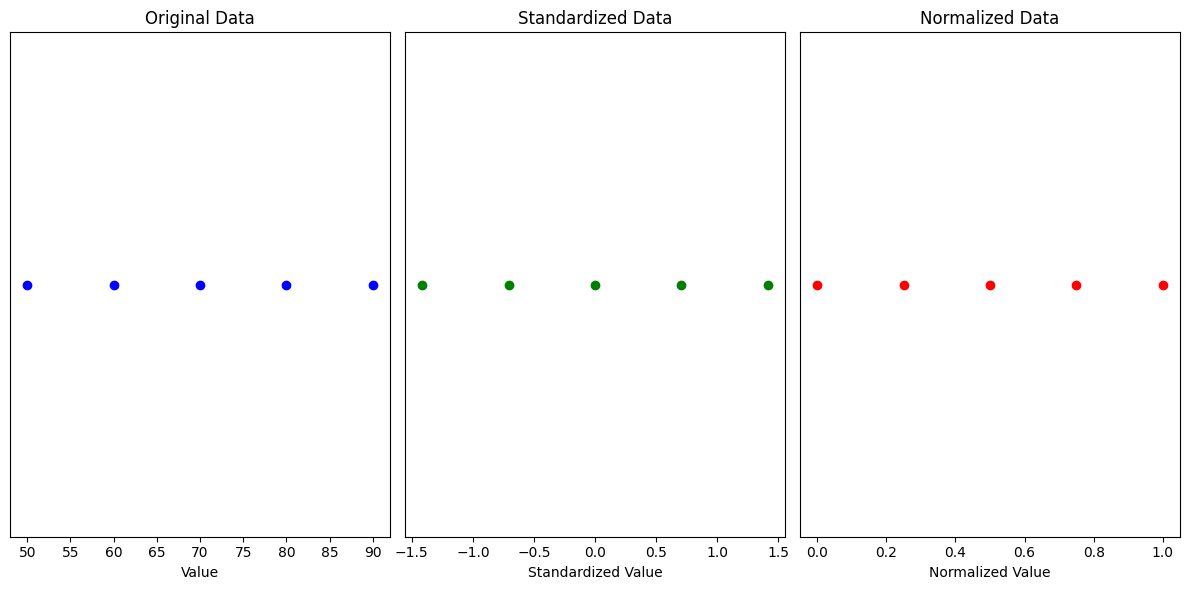

Original Data:
 [[50]
 [60]
 [70]
 [80]
 [90]]
Standardized Data:
 [[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]
Normalized Data:
 [[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Example data
data = np.array([[50], [60], [70], [80], [90]])

# Standardization using StandardScaler
scaler_standard = StandardScaler()
standardized_data = scaler_standard.fit_transform(data)

# Normalization using MinMaxScaler
scaler_minmax = MinMaxScaler()
normalized_data = scaler_minmax.fit_transform(data)

# Plotting the results
plt.figure(figsize=(12, 6))

# Original Data
plt.subplot(1, 3, 1)
plt.scatter(data, np.zeros_like(data), color='blue', label='Original Data')
plt.title('Original Data')
plt.xlabel('Value')
plt.yticks([])

# Standardized Data
plt.subplot(1, 3, 2)
plt.scatter(standardized_data, np.zeros_like(standardized_data), color='green', label='Standardized Data')
plt.title('Standardized Data')
plt.xlabel('Standardized Value')
plt.yticks([])

# Normalized Data
plt.subplot(1, 3, 3)
plt.scatter(normalized_data, np.zeros_like(normalized_data), color='red', label='Normalized Data')
plt.title('Normalized Data')
plt.xlabel('Normalized Value')
plt.yticks([])

plt.tight_layout()
plt.show()

print("Original Data:\n", data)
print("Standardized Data:\n", standardized_data)
print("Normalized Data:\n", normalized_data)
